In [2]:
from psycopg2 import connect
import psycopg2.sql as pg
import configparser
import datetime
%matplotlib inline #this is to allow you to see the plot in the notebook
import numpy as np
import pandas as pd
import pandas.io.sql as pandasql
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set(color_codes=True)
from IPython.display import HTML
def print_table(sql, con):
    return HTML(pandasql.read_sql(sql, con).to_html(index=False))

In [3]:
CONFIG = configparser.ConfigParser()
CONFIG.read(r'/home/jchew/local/db.cfg')
dbset = CONFIG['DBSETTINGS']
con = connect(**dbset)

In [24]:
with con:   
    sql = pg.SQL('''
    SELECT intersection_uid, time_bin, avg_vol, gap_size::time 
    FROM miovision_api.volume_gap
    WHERE time_bin IN ('03:00:00'::time)
    ''')
    data_3am = pandasql.read_sql(sql, con)
    #print_table(sql, con)

Text(0.5, 1.0, 'Hourly volumes vs gap sizes at 3am')

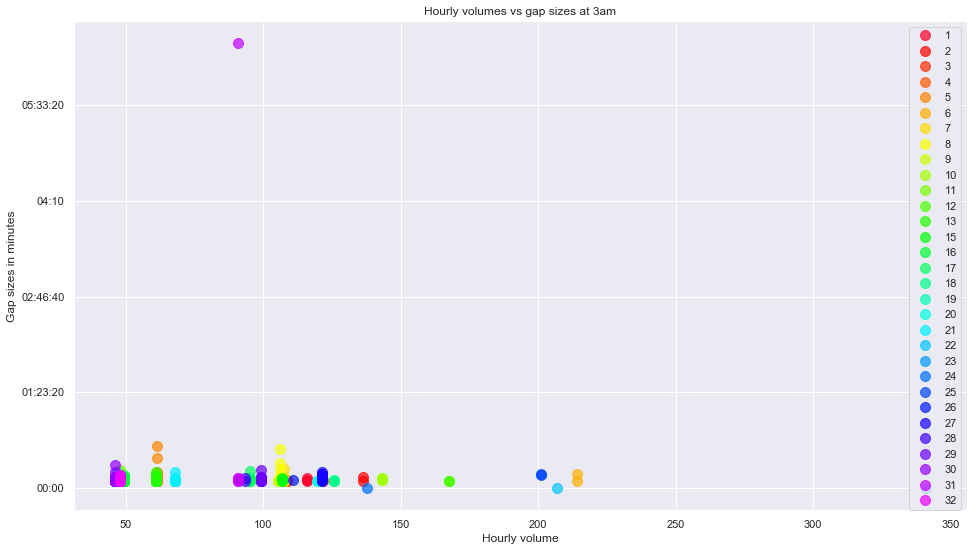

In [26]:
fig, ax = plt.subplots (1,1, figsize=(16,9))
NUM_COLORS = 32
cm = plt.get_cmap('gist_rainbow')
colors = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

groups = data_3am.groupby('intersection_uid')
for i, (intersection_uid, data) in enumerate(groups):
    ax.plot(data.avg_vol, data.gap_size, marker = 'o', markersize = 10 ,
            alpha = 0.7, linestyle = '', label = intersection_uid, color = colors[i])

ax.legend()
ax.set_xlabel('Hourly volume')
ax.set_ylabel('Gap sizes in minutes')
ax.set_title('Hourly volumes vs gap sizes at 3am')

In [27]:
with con:
    sql = pg.SQL('''
    SELECT intersection_uid, time_bin, avg_vol, gap_size::time  
    FROM miovision_api.volume_gap
    WHERE time_bin IN ('17:00:00'::time)
    ''')
    data_5pm = pandasql.read_sql(sql, con)

Text(0.5, 1.0, 'Hourly volumes vs gap sizes at 5pm')

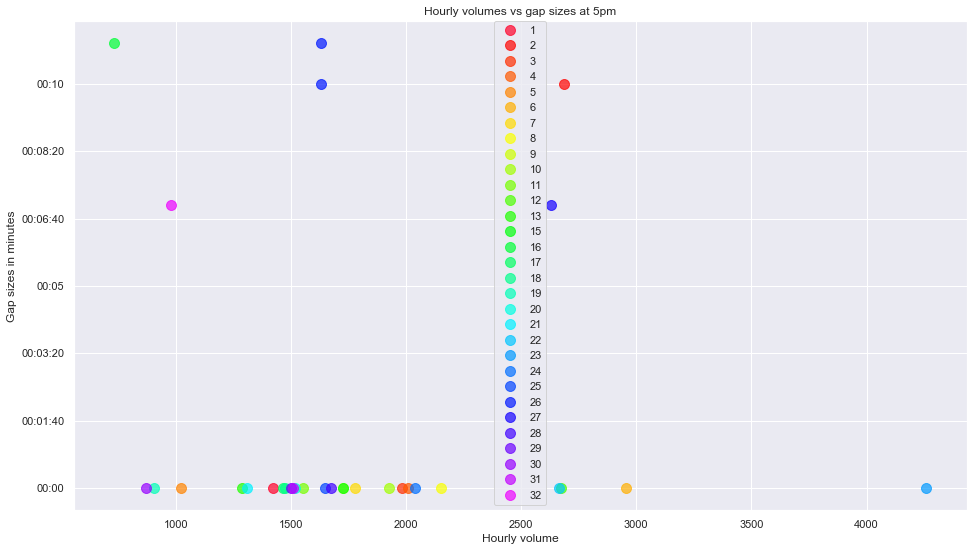

In [28]:
fig, ax = plt.subplots (1,1, figsize=(16,9))
NUM_COLORS = 32
cm = plt.get_cmap('gist_rainbow')
colors = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

groups = data_5pm.groupby('intersection_uid')
for i, (intersection_uid, data) in enumerate(groups):
    ax.plot(data.avg_vol, data.gap_size, marker = 'o', markersize = 10 ,
            alpha = 0.7, linestyle = '', label = intersection_uid, color = colors[i])

ax.legend()
ax.set_xlabel('Hourly volume')
ax.set_ylabel('Gap sizes in minutes')
ax.set_title('Hourly volumes vs gap sizes at 5pm')